#### 목표
- sklearn 사용법 익히기
- 비만도 데이터를 기반으로 사람의 비만도를 예측하는 모델을 만들어보자

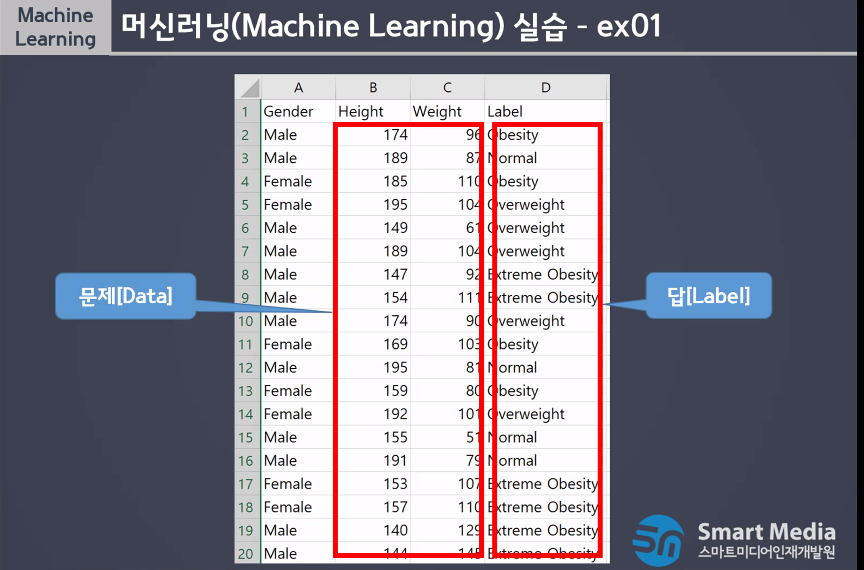
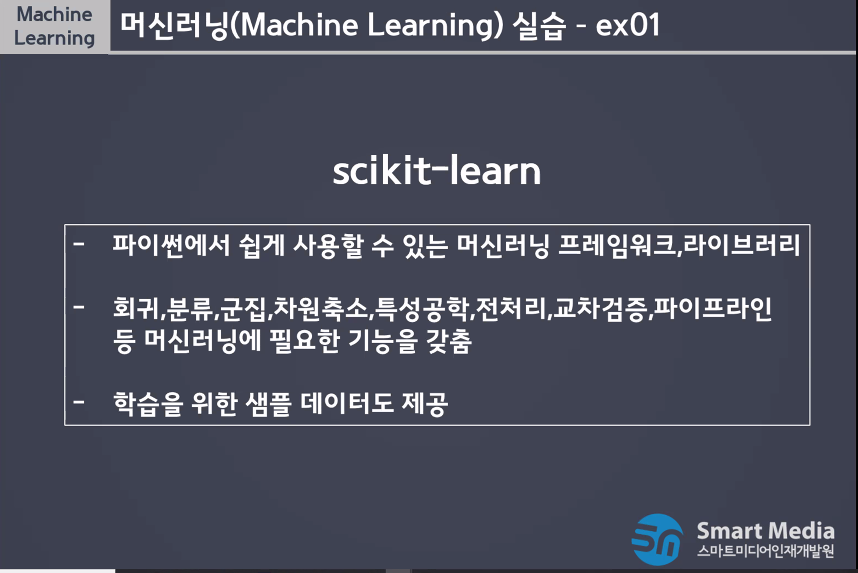
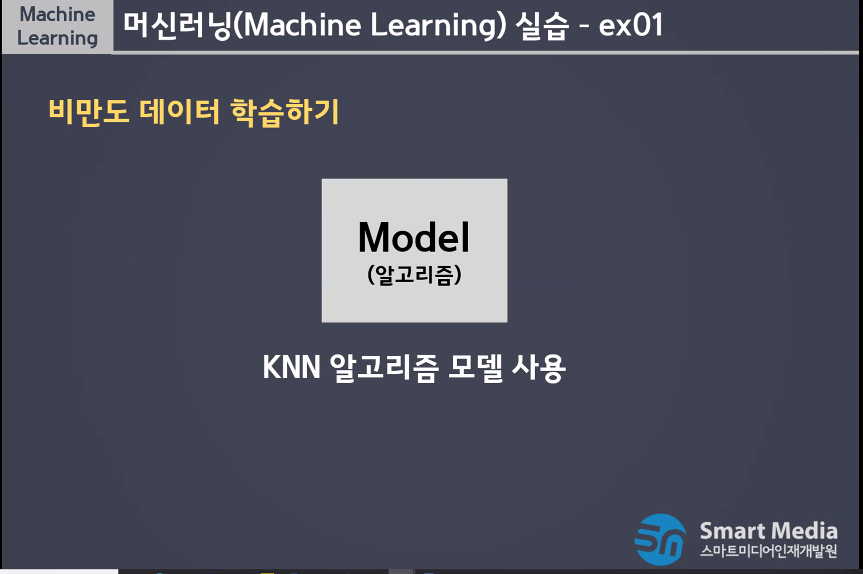
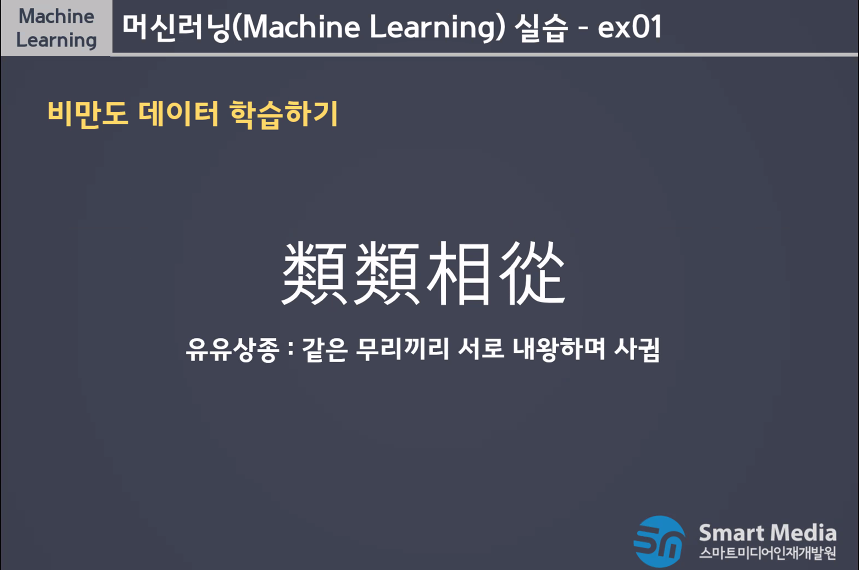
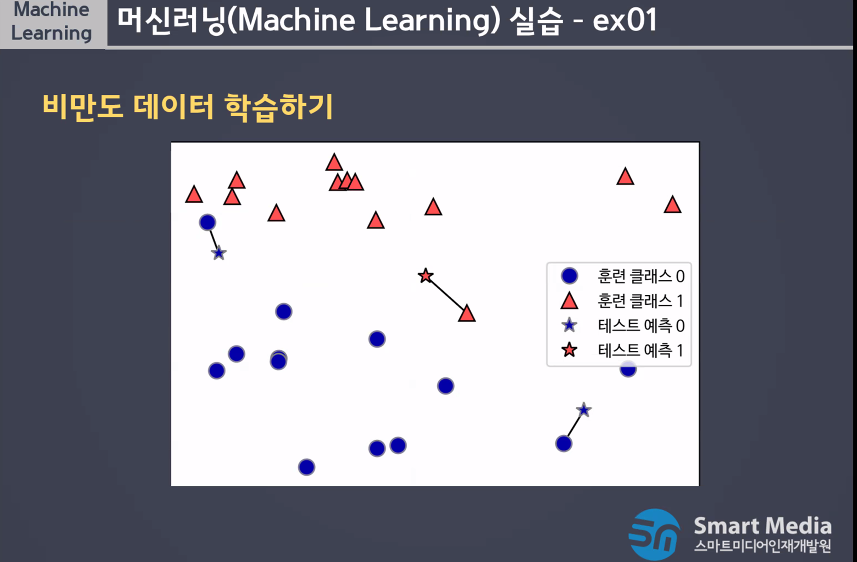
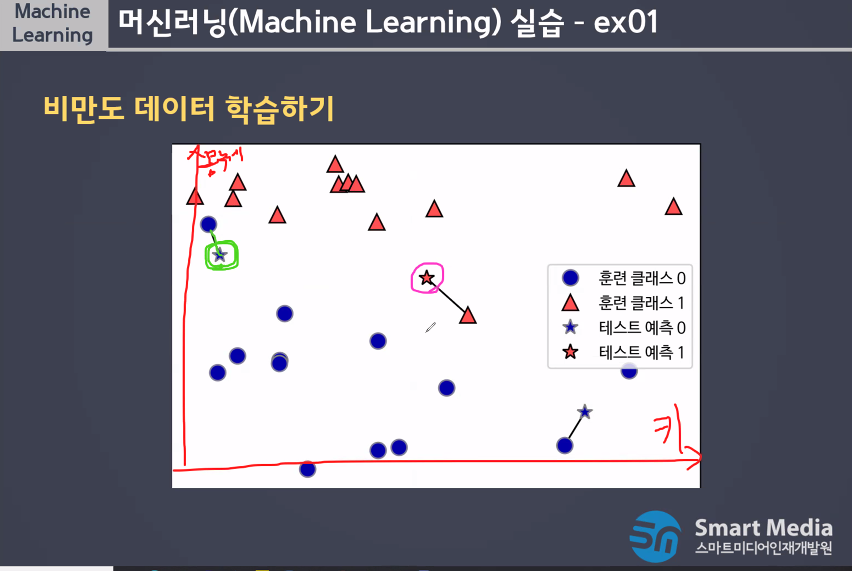
가장 가까운걸 본거야!!
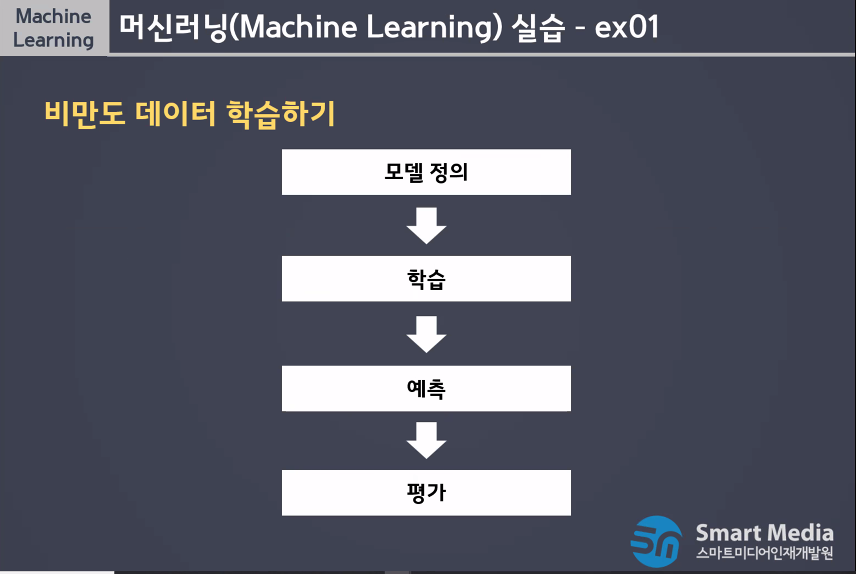
4번 평가 단계 중요!! - 제대로 학습하고 예측하는지 평가
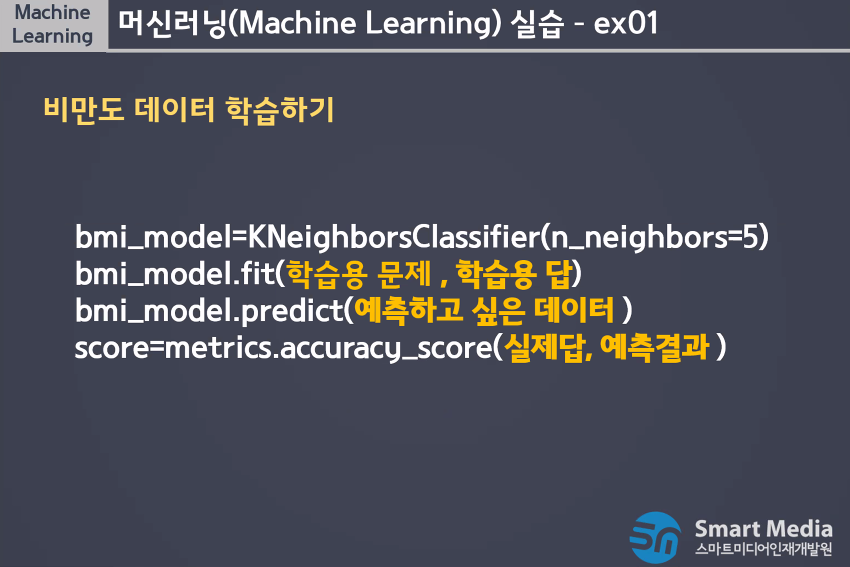

####  1. 모델 정의

In [9]:
# KNN 알고리즘을 사용하는 모델 사용
from sklearn.neighbors import KNeighborsClassifier # KNN 클래스 import
bmi_model = KNeighborsClassifier() # 객체를 생성하는 생성자 호출! () 써서


#### 2. 모델학습 

In [11]:
import pandas as pd

In [15]:
bmi_data = pd.read_csv("data/bmi_lbs.csv") #csv파일 로딩
bmi_data.head() # 상위 5개 데이터 확인

,Label,Gender,Height,Weight(lbs)
0,Obesity,Male,174,211.6416
1,Normal,Male,189,191.8002
2,Obesity,Female,185,242.5060
3,Overweight,Female,195,229.2784
4,Overweight,Male,149,134.4806


In [ ]:
# 데이터를 이해하고 학습시킬 필요가 있다.
# 1. Label 컬럼의 비만도 종류
# 2. Weight(lbs)를 Weight(kg)로 변경해보자.

In [17]:
# 1. Label 컬럼의 비만도 종류

bmi_data["Label"].value_counts()  #1차원 시리즈

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

In [20]:
bmi_data["Label"].unique()


array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [17]:
# 2. Weight(lbs)를 Weight(kg)로 변경해보자.
bmi_data["Weight(kg)"]=bmi_data["Weight(lbs)"]*0.453592

In [82]:
bmi_data.head()

,Label,Gender,Height,Weight(lbs),Weight(kg)
0,Obesity,Male,174,211.6416,95.998937
1,Normal,Male,189,191.8002,86.999036
2,Obesity,Female,185,242.5060,109.998782
3,Overweight,Female,195,229.2784,103.998848
4,Overweight,Male,149,134.4806,60.999324


In [60]:
# 학습을 위해 문제와 답을 추출하자
# 문제는 x 답은 y
x = bmi_data[["Weight(kg)","Height"]]
y = bmi_data["Label"]

In [64]:
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [65]:
bmi_model.fit(x,y) # 학습

KNeighborsClassifier()

### 3. 모델예측 

In [83]:
# 샘플데이터 추출
x_sample=bmi_data.iloc[[5,63,301,256,470],[4,2]]
y_sample=bmi_data.iloc[[5,63,301,256,470],0]

In [96]:
x_sample

,Weight(kg),Height
5,103.998848,189
63,82.999081,190
301,107.998804,182
256,108.998793,172
470,141.998427,147


In [84]:
bmi_predict = bmi_model.predict(x_sample) #5명의 샘플 데이터를 예측
bmi_predict

array(['Overweight', 'Normal', 'Obesity', 'Obesity', 'Extreme Obesity'],
      dtype=object)

####  4.모델평가


In [23]:
# 평가 합수 활용하기
from sklearn.metrics import accuracy_score # 정확도(전체 예측 결과 중 정확히 맞춘 비율)

In [86]:
score = accuracy_score(y_sample, bmi_predict)
score

1.0

In [85]:
# 활용
bmi_model.predict([[56,156],[73,185]])

array(['Normal', 'Normal'], dtype=object)

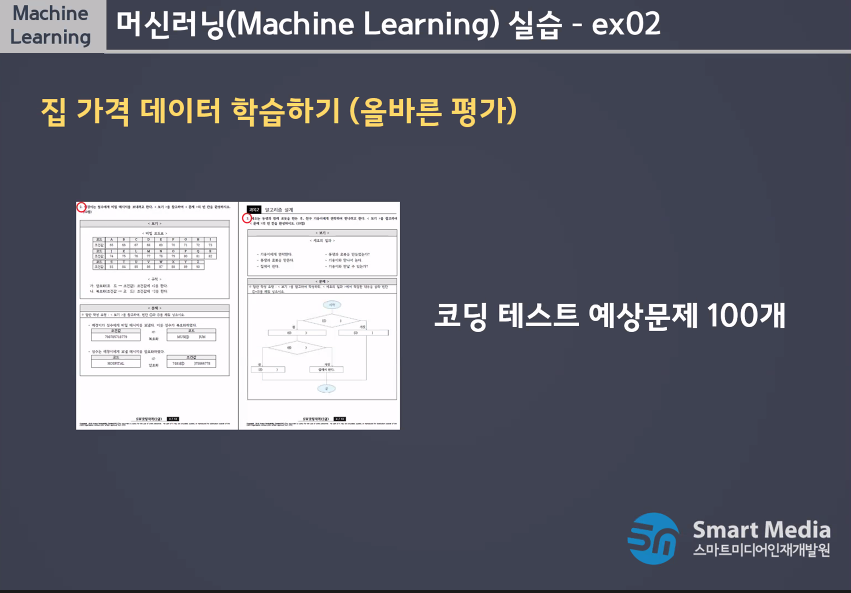
학습용 데이터와 평가용 데이터가 구분되어 있어야!!
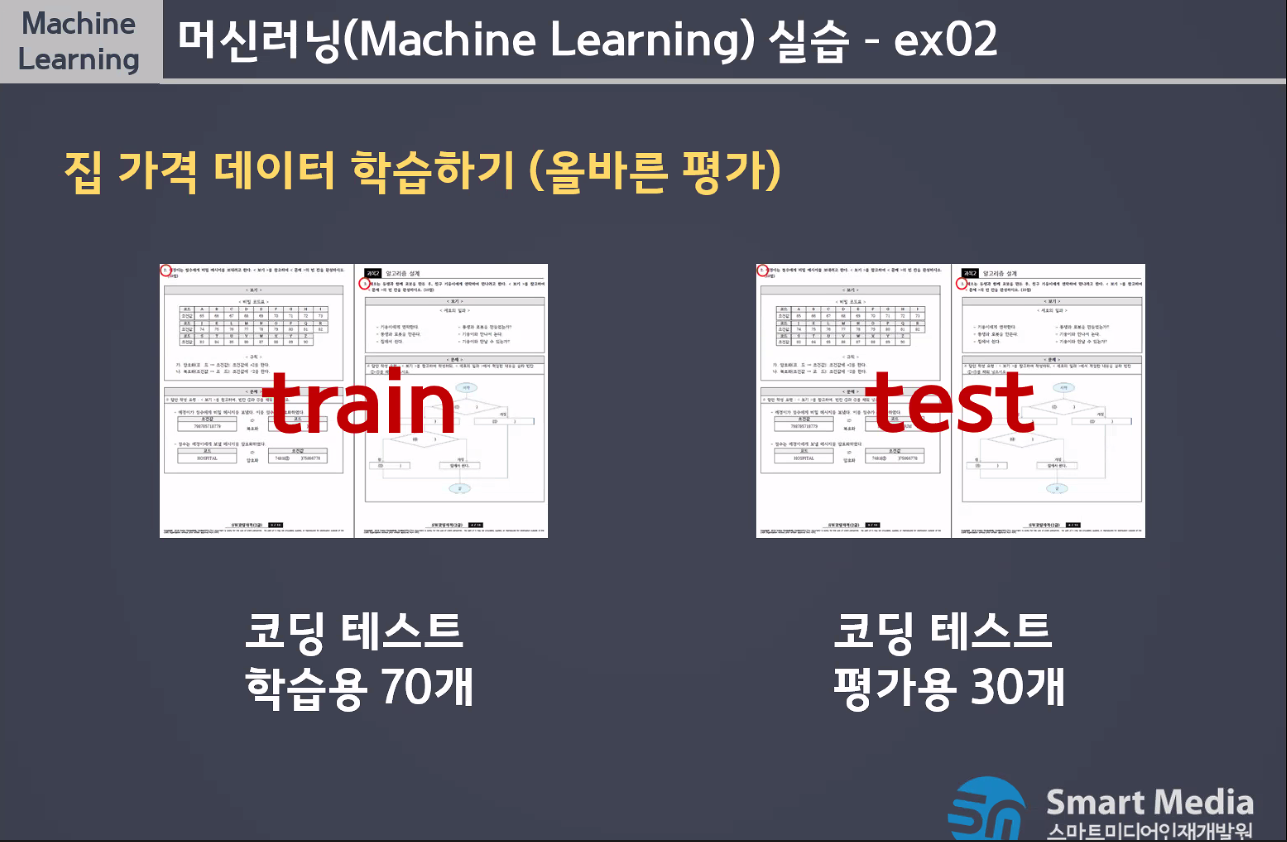

### 문제점
- 500명의 비만도 데이터를 학습하고 그 중에 5명의 샘플을 추출해서 평가하는 방법은 옳지 않다.
- 이미 모델이 500명의 정보를 학습했기 때문에 5명의 비만도를 잘 예측할 확률이 올라간다
- 그래서 사전에 데이터를 훈련용(Train)과 평가용(test)으로 분리해서 관리한다.
- 일반적으로 비율은 7:3 으로 진행한다.


In [18]:
from sklearn.model_selection import train_test_split # 훈련용,평가용 데이터 분리 함수
# 별다를 설정 없은 75 : 25로 분리해주게 되어있어!

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1130)
x_train.head()

NameError: name 'x' is not defined

In [105]:
x_train.shape, y_train.shape

((350, 2), (350,))

In [106]:
x_test.shape, y_test.shape

((150, 2), (150,))

In [ ]:
# 모델정의 > 모델학습 > 모델예측 > 모델평가

In [131]:
bmi_model1 = KNeighborsClassifier()


In [20]:
x1 = bmi_data[["Height","Weight(kg)"]]
y1 = bmi_data["Label"]

In [21]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3, random_state=1130)
x1_train.head()

,Height,Weight(kg)
59,143,87.999025
204,145,159.998228
151,140,51.999424
16,157,109.998782
98,195,68.999236


In [142]:
bmi_model1.fit(x1_train,y1_train) # 학습

KNeighborsClassifier()

In [143]:
bmi_predict1 = bmi_model1.predict(x1_test) #5명의 샘플 데이터를 예측
bmi_predict1

array(['Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Overweight',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Normal', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Extremely Weak', 'Extreme Obesity',
       'Obesity', 'Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Extreme Obesity',
       'Extremely Weak', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Normal', 'Extremely Weak', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Extreme Obesity',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal', 'Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Obesity', 'Overweight',
       'Extreme Obe

In [144]:
score1 = accuracy_score(y1_test, bmi_predict1)
score1

0.8666666666666667

In [22]:
# 모델정의 > 모델학습 > 모델예측 > 모델평가
#선생님답!!
bmi_model2 = KNeighborsClassifier()
bmi_model2.fit(x1_train,y1_train)
pre = bmi_model2.predict(x1_test)

In [24]:
score = accuracy_score(y1_test,pre)
score

0.8666666666666667